In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
import nltk

In [59]:
df = pd.read_csv(r'df_modificado.csv')

Creo unas nubes de palabras con las columnas principales que poseen texto para visualizar que palabras se repiten mas y evaluar que modelo utilizar.

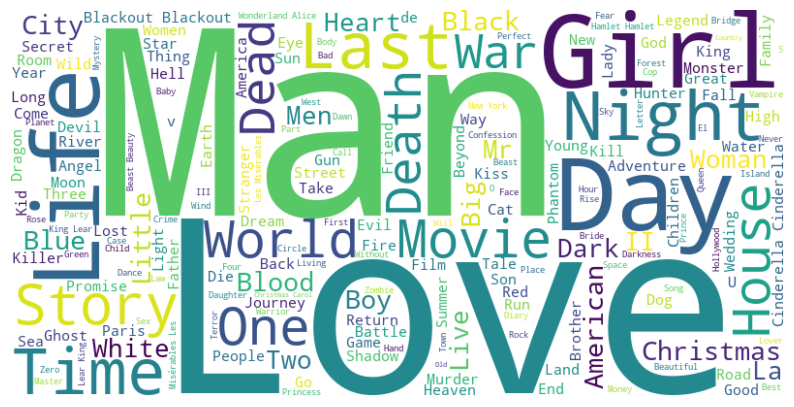

In [28]:
texto = ' '.join(df['title'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

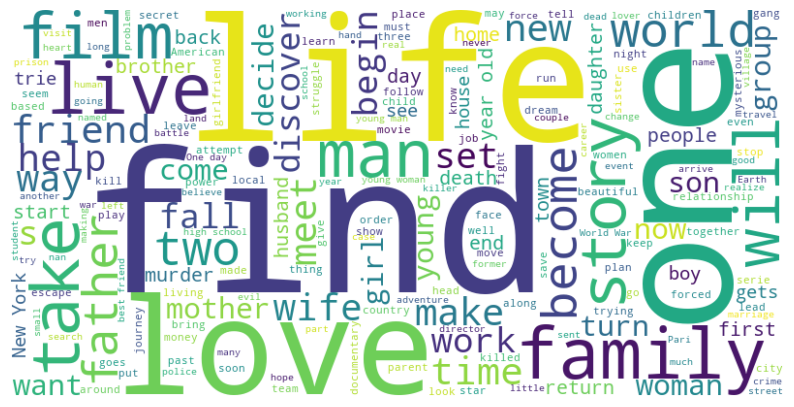

In [29]:
texto = ' '.join(df['overview'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
texto = ' '.join(df['overview'].astype(str))

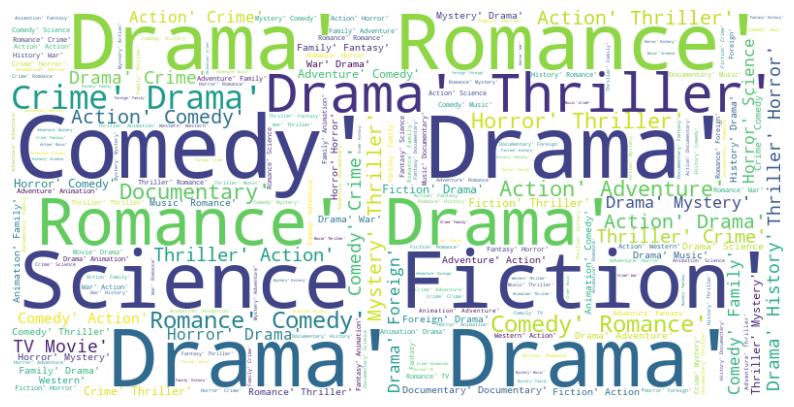

In [31]:
texto = ' '.join(df['genres'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Elimino columnas que no sirven para entrenar el modelo como 'id' o 'release_date' y otras que considero poco utiles.

In [32]:
df = df.drop(['belongs_to_collection', 'id', 'original_language', 'production_countries', 'release_date' , 'spoken_languages', 'status', 'release_year'], axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54957 entries, 0 to 54956
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 54957 non-null  object 
 1   texto_lemmatizado     54957 non-null  object 
 2   budget                54957 non-null  float64
 3   genres                54957 non-null  object 
 4   overview              53924 non-null  object 
 5   popularity            54957 non-null  float64
 6   production_companies  54957 non-null  object 
 7   revenue               54957 non-null  float64
 8   runtime               54696 non-null  float64
 9   tagline               25080 non-null  object 
 10  vote_average          54957 non-null  float64
 11  vote_count            54957 non-null  float64
 12  cast                  54957 non-null  object 
 13  crew                  54957 non-null  object 
 14  return                54957 non-null  float64
dtypes: float64(7), obje

In [34]:
df.head(1)

,title,texto_lemmatizado,budget,genres,overview,popularity,production_companies,revenue,runtime,tagline,vote_average,vote_count,cast,crew,return
0,Toy Story,"['Animation', ',', 'Comedy', ',', 'Family', 'P...",30000000.0,"['Animation', 'Comedy', 'Family']","Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],373554033.0,81.0,NaN,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant...",12.451801


Realizo transformaciones de tipo de dato y elimino corchetes y comillas de algunas columnas.

In [35]:
df['genres'] = df['genres'].astype(str)

In [36]:
df['genres'] = df['genres'].str.strip("[]").str.replace("'", "")

In [37]:
df['production_companies'] = df['production_companies'].astype(str)
df['production_companies'] = df['production_companies'].str.strip("[]").str.replace("'", "")

In [38]:
df['cast'] = df['cast'].astype(str)
df['cast'] = df['cast'].str.strip("[]").str.replace("'", "")

In [39]:
df['crew'] = df['crew'].astype(str)
df['crew'] = df['crew'].str.strip("[]").str.replace("'", "")

Armo histogramas para ver la distribucion de las columnas numericas.

Text(0, 0.5, 'Frecuencia')

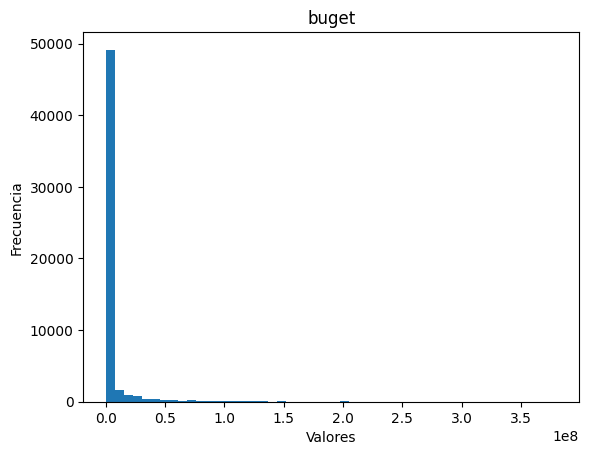

In [40]:
plt.hist(df['budget'], bins= 50)  
plt.title('buget')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

(0.0, 40000.0)

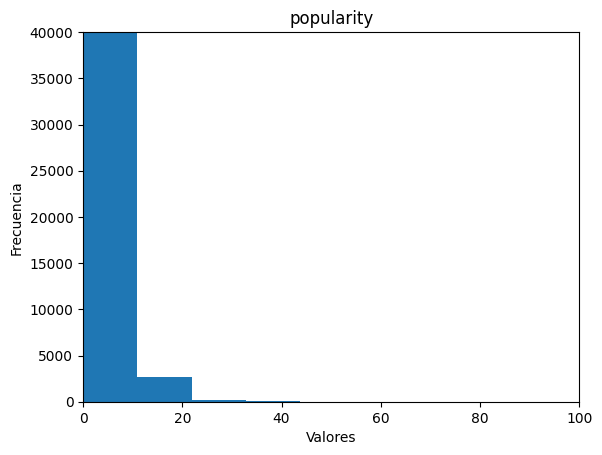

In [41]:
plt.hist(df['popularity'], bins= 50)  
plt.title('popularity')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.xlim(0, 100)  
plt.ylim(0, 40000)

Text(0, 0.5, 'Frecuencia')

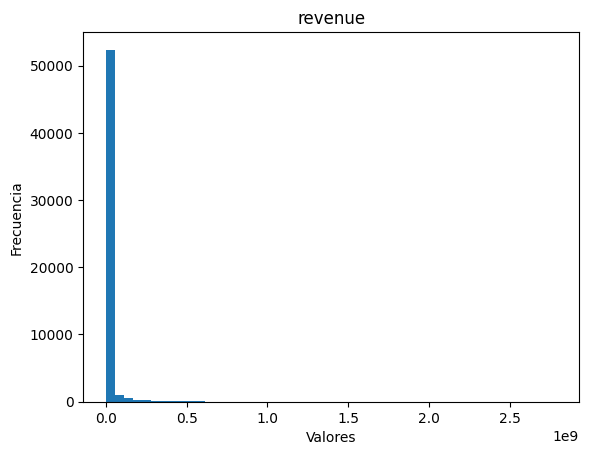

In [42]:
plt.hist(df['revenue'], bins= 50)  
plt.title('revenue')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

(0.0, 400.0)

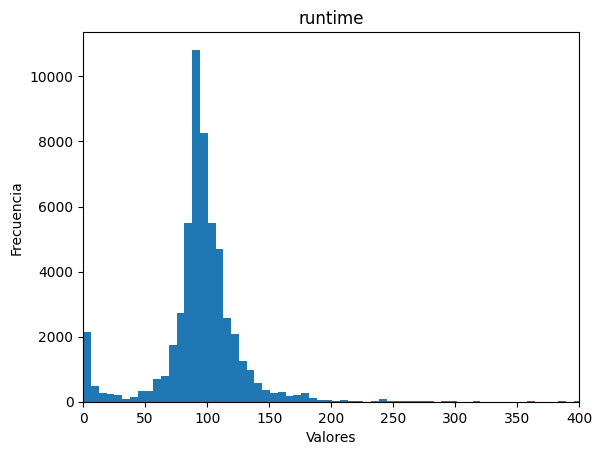

In [43]:
plt.hist(df['runtime'], bins= 200)  
plt.title('runtime')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.xlim(0, 400)  

Hay varias peliculas que tienen una duracion de 0 por lo que decido reemplazar esos valores con el promedio de la columna para no eliminar los registros.

In [45]:
mean_runtime = df['runtime'].mean()
df['runtime'] = df['runtime'].replace(0, mean_runtime)

Text(0, 0.5, 'Frecuencia')

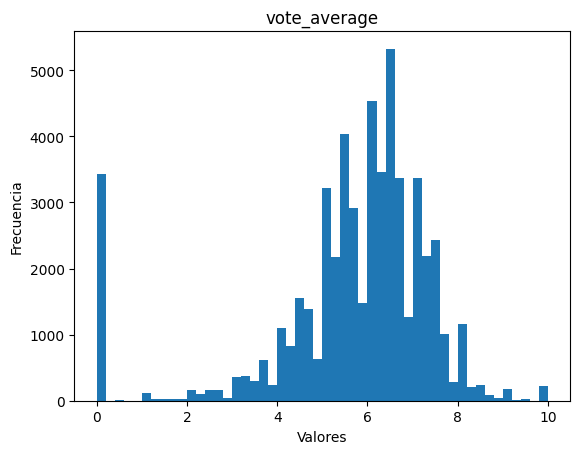

In [46]:
plt.hist(df['vote_average'], bins= 50)  
plt.title('vote_average')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

(0.0, 6000.0)

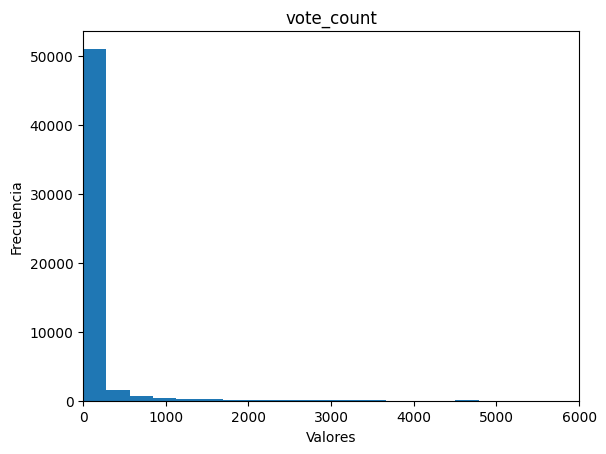

In [47]:
plt.hist(df['vote_count'], bins= 50)  
plt.title('vote_count')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.xlim(0, 6000)  

Text(0, 0.5, 'Frecuencia')

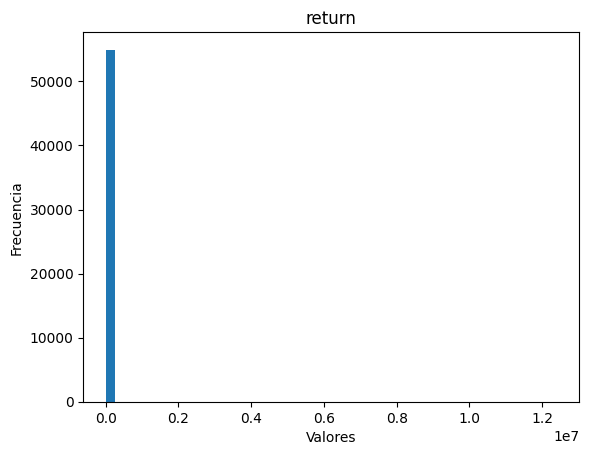

In [48]:
plt.hist(df['return'], bins= 50)  
plt.title('return')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
#plt.xlim(0, 6000)  

Hay muchas columnas con celdas en 0, decido dejarlo de momento y seguir con el analisis.
Armo una matriz de correlacion para ver la relacion entre variables numericas.

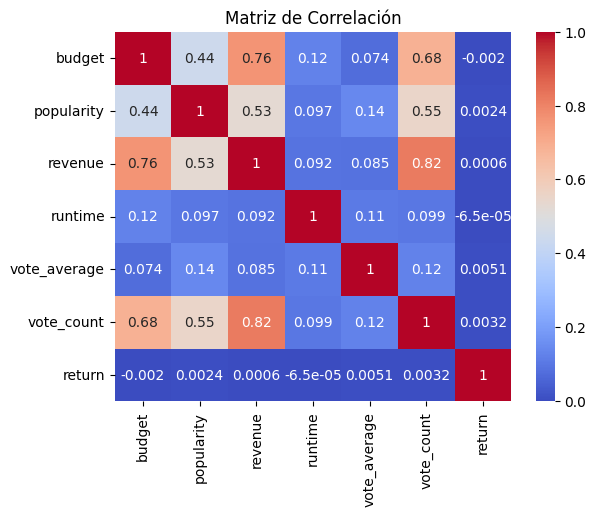

In [49]:
df_subset = df[['budget', 'popularity', 'revenue', 'runtime' ,'vote_average' , 'vote_count','return']]
correlation_matrix = df_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Decido eliminar las columnas siguienes porque tienen muchos valores nulos.

In [50]:
df = df.drop(['budget', 'revenue', 'return'], axis=1)

Armo algunos boxplot y veo que hay muchos outlayer. Considero que no son errores y los dejo pasar.

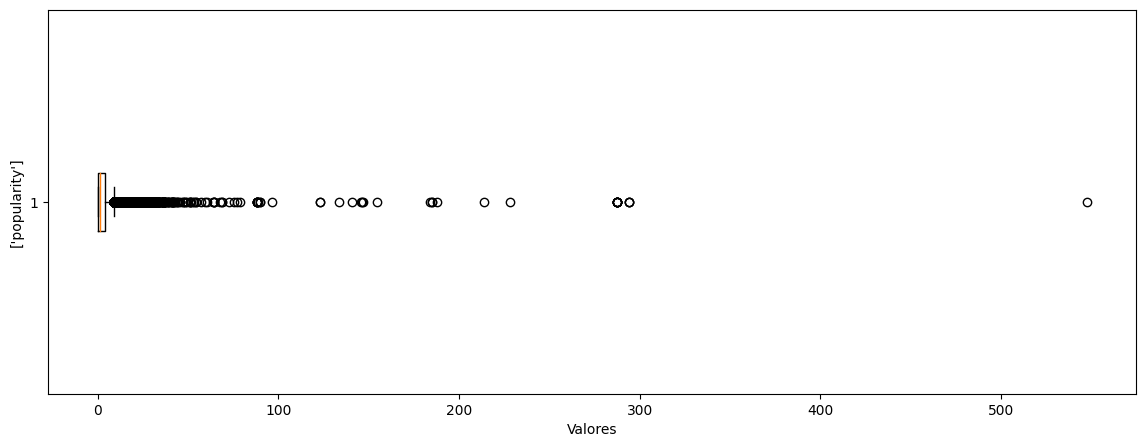

In [51]:
plt.boxplot(df['popularity'], vert=False)

plt.ylabel(['popularity'])
plt.xlabel('Valores')
plt.subplots_adjust(left=0.2, right=1.9, top=0.9, bottom=0.1)


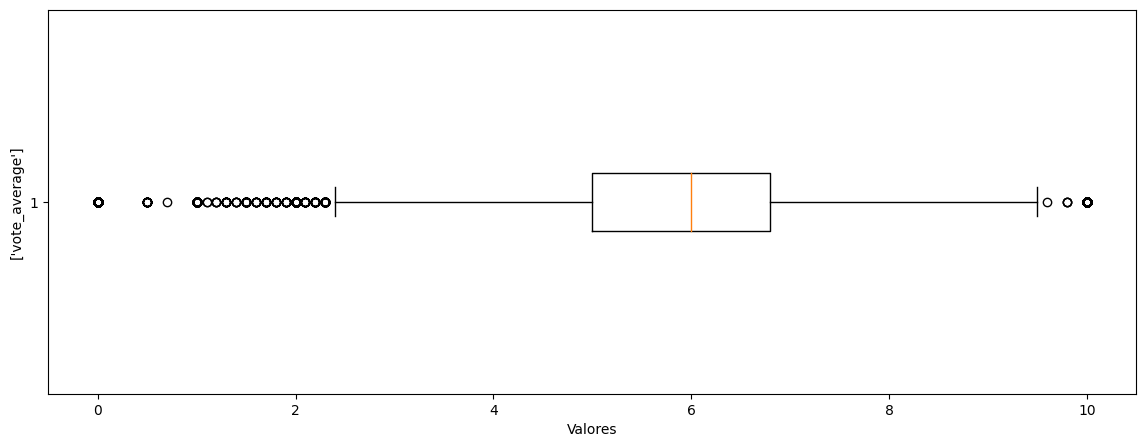

In [52]:
plt.boxplot(df['vote_average'], vert=False)

plt.ylabel(['vote_average'])
plt.xlabel('Valores')
plt.subplots_adjust(left=0.2, right=1.9, top=0.9, bottom=0.1)

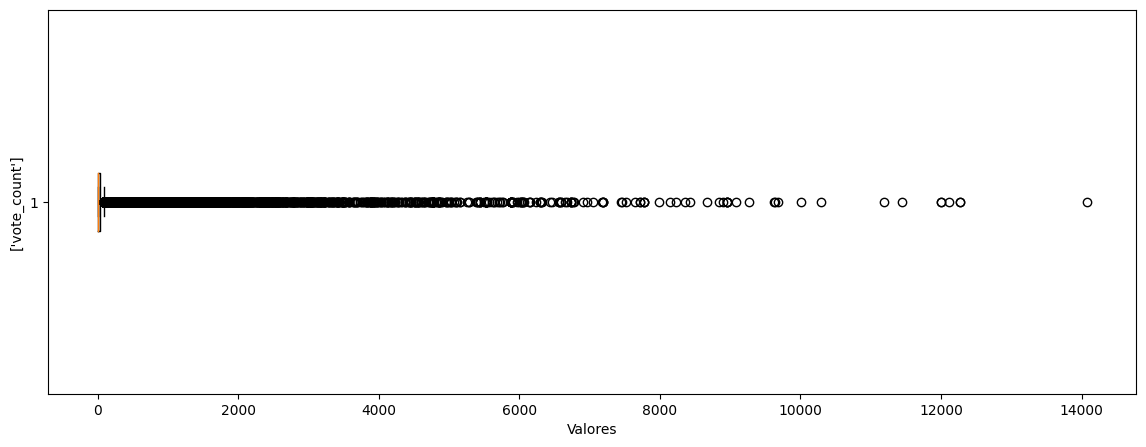

In [53]:
plt.boxplot(df['vote_count'], vert=False)

plt.ylabel(['vote_count'])
plt.xlabel('Valores')
plt.subplots_adjust(left=0.2, right=1.9, top=0.9, bottom=0.1)

In [54]:
df.head(1)

,title,texto_lemmatizado,genres,overview,popularity,production_companies,runtime,tagline,vote_average,vote_count,cast,crew
0,Toy Story,"['Animation', ',', 'Comedy', ',', 'Family', 'P...","Animation, Comedy, Family","Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,81.0,NaN,7.7,5415.0,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","John Lasseter, Joss Whedon, Andrew Stanton, Jo..."


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54957 entries, 0 to 54956
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 54957 non-null  object 
 1   texto_lemmatizado     54957 non-null  object 
 2   genres                54957 non-null  object 
 3   overview              53924 non-null  object 
 4   popularity            54957 non-null  float64
 5   production_companies  54957 non-null  object 
 6   runtime               54696 non-null  float64
 7   tagline               25080 non-null  object 
 8   vote_average          54957 non-null  float64
 9   vote_count            54957 non-null  float64
 10  cast                  54957 non-null  object 
 11  crew                  54957 non-null  object 
dtypes: float64(4), object(8)
memory usage: 5.0+ MB


Realizo unas ultimas modificaciones para llenar los nulos en la columna 'overview' y 'tagline'

In [56]:
df['overview'] = df['overview'].fillna('NaN')

In [57]:
df['tagline'] = df['tagline'].fillna('NaN')

Guardo el archivo

In [58]:
df.to_csv(r'df_modificado.csv', index=False)